In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy

In [5]:
%pip install openpyxl

In [6]:
dataframe = {'S/n': [1,2,3,4,5,6,7,8,9,10],
             'Names':['Alvin', 'Ray', 'John','Greg', 'Dorcas', 'Mabel', 'Tim', 'Fred', 'Mark', 'Paul'],
             'Age': [21,28,27,19,30,32,25, 35,40, 18],
             'Subjects':['Maths','English','French','Geography','Biology', 'Physics', 'Chemistry','ML', 'Gen AI', 'Data Science'],
             'Scores':[210, 350,200,380,401,259,370,265,315,465]}

df= pd.DataFrame(data = dataframe)

df.head(10)

,S/n,Names,Age,Subjects,Scores
0,1,Alvin,21,Maths,210
1,2,Ray,28,English,350
2,3,John,27,French,200
3,4,Greg,19,Geography,380
4,5,Dorcas,30,Biology,401
5,6,Mabel,32,Physics,259
6,7,Tim,25,Chemistry,370
7,8,Fred,35,ML,265
8,9,Mark,40,Gen AI,315
9,10,Paul,18,Data Science,465


In [7]:
x = df['Scores']
y = df['Age']

regr = np.polyfit(x,y,1)
regr

array([-2.60855464e-02,  3.58865032e+01])

In [8]:
from scipy import stats

In [9]:
slope, intercept,r,p,std_err = stats.linregress(x,y)
slope

-0.026085546440233216

In [10]:
intercept

35.88650318053498

In [11]:
r

-0.3200942370465904

In [12]:
p

0.36723429039447275

In [13]:
std_err

0.027296308556992183

In [14]:
off_supply = pd.read_excel(r"C:\Users\HP\Downloads\Ofiice Supply Corr.xlsx")
off_supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2021-01-06,East,Jones,Pencil,95,1.99,189.05
1,2021-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2021-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2021-02-26,Central,Gill,Pen,27,19.99,539.73
4,2021-03-15,West,Sorvino,Pencil,56,2.99,167.44


In [15]:
off_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   OrderDate  43 non-null     datetime64[ns]
 1   Region     43 non-null     object        
 2   Rep        43 non-null     object        
 3   Item       43 non-null     object        
 4   Units      43 non-null     int64         
 5   Unit Cost  43 non-null     float64       
 6   Total      43 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 2.5+ KB


In [16]:
off_supply['Grand Total'] = off_supply['Units']*off_supply['Total']

off_supply.head()

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total,Grand Total
0,2021-01-06,East,Jones,Pencil,95,1.99,189.05,17959.75
1,2021-01-23,Central,Kivell,Binder,50,19.99,999.50,49975.00
2,2021-02-09,Central,Jardine,Pencil,36,4.99,179.64,6467.04
3,2021-02-26,Central,Gill,Pen,27,19.99,539.73,14572.71
4,2021-03-15,West,Sorvino,Pencil,56,2.99,167.44,9376.64


In [17]:
off_supply.describe()

,OrderDate,Units,Unit Cost,Total,Grand Total
count,43,43.000000,43.000000,43.000000,43.000000
mean,2021-12-29 00:00:00,49.325581,20.308605,456.462326,27874.807907
min,2021-01-06 00:00:00,2.000000,1.290000,9.030000,63.210000
25%,2021-07-03 12:00:00,27.500000,3.990000,144.590000,3767.885000
50%,2021-12-29 00:00:00,53.000000,4.990000,299.400000,11494.240000
75%,2022-06-25 12:00:00,74.500000,17.990000,600.180000,40419.000000
max,2022-12-21 00:00:00,96.000000,275.000000,1879.060000,176631.640000
std,NaN,30.078248,47.345118,447.022104,38141.644644


In [18]:
import statsmodels.formula.api as smf

mode = smf.ols('Total ~ Units' , data = off_supply)

In [19]:
result = mode.fit()

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     8.193
Date:                Fri, 13 Sep 2024   Prob (F-statistic):            0.00660
Time:                        12:29:45   Log-Likelihood:                -319.00
No. Observations:                  43   AIC:                             642.0
Df Residuals:                      41   BIC:                             645.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.2953    122.033      1.289      0.205     -89.155     403.746
Units          6.0651      2.119      2.862      0.007       1.786      10.345
==============================================================================
Omnibus:                        8.971   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.505
Skew:                           1.072   Prob(JB):                       0.0142
Kurtosis:                       3.383   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
def my_reg(x):
    return 6.07*x + 157.3
x = off_supply['Units']
y = off_supply['Total']

reg_fn = list(map(my_reg, x))


<function matplotlib.pyplot.show(close=None, block=None)>

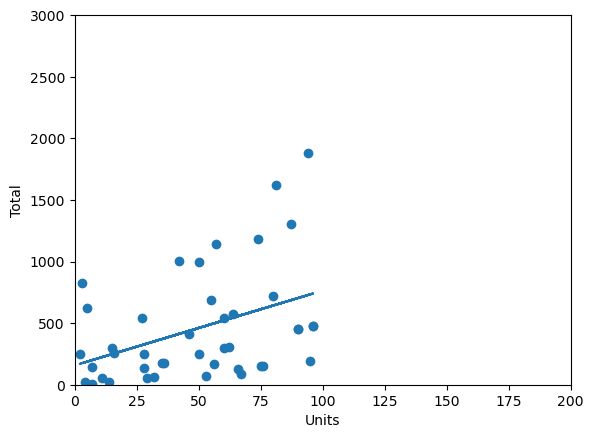

In [22]:
plt.scatter(x,y)
plt.plot(x,reg_fn)
plt.ylim(ymin =0, ymax = 3000)
plt.xlim(xmin = 0, xmax = 200)
plt.ylabel('Total')
plt.xlabel('Units')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

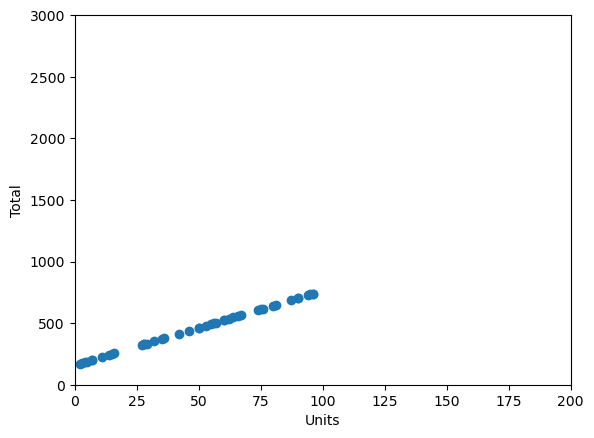

In [23]:
plt.scatter(x,reg_fn)
plt.ylim(ymin =0, ymax = 3000)
plt.xlim(xmin = 0, xmax = 200)
plt.ylabel('Total')
plt.xlabel('Units')

plt.show

In [47]:
from scipy import constants

<function matplotlib.pyplot.show(close=None, block=None)>

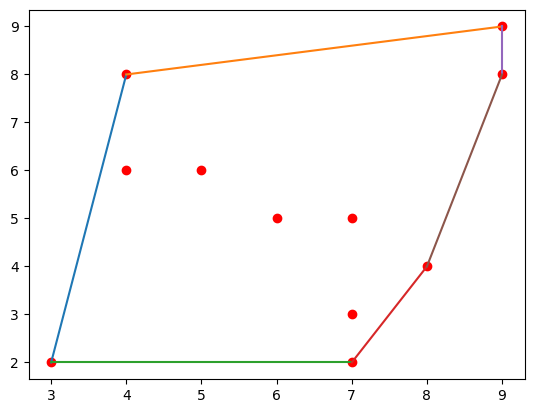

In [98]:
from scipy.spatial import ConvexHull
myarr = np.random.RandomState(2).randint(1, high=11, size = (11,2))
Cvh = ConvexHull(myarr)
Cvhr = Cvh.simplices

plt.scatter(myarr[:,0], myarr[:,1], color = 'r')
for points in Cvhr:
    plt.plot(myarr[points, 0], myarr[points,1])
plt.show
                          

<function matplotlib.pyplot.show(close=None, block=None)>

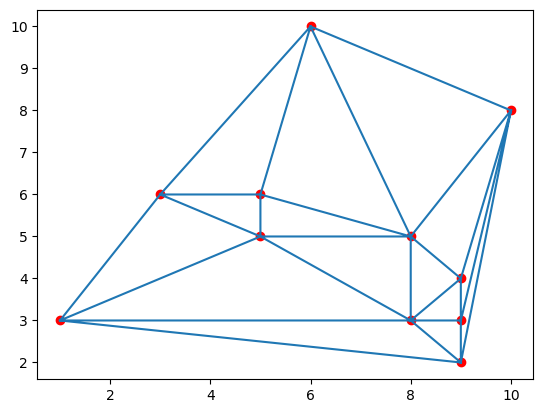

In [86]:
from scipy.spatial import Delaunay
myarr = np.random.randint(1, high=11, size = (11,2))
Dvh = Delaunay(myarr)
Dvhr = Dvh.simplices

plt.scatter(myarr[:,0], myarr[:,1], color = 'r')
plt.triplot(myarr[:, 0], myarr[:,1], Dvhr)
plt.show

In [88]:
print(dir(scipy))

['LowLevelCallable', '__version__', 'cluster', 'constants', 'datasets', 'fft', 'fftpack', 'integrate', 'interpolate', 'io', 'linalg', 'misc', 'ndimage', 'odr', 'optimize', 'show_config', 'signal', 'sparse', 'spatial', 'special', 'stats', 'test']
